<h2>Name: Pratham Agrawal</h2>
<h2>PRN: 22070521078</h2>
<h2>Sem: VII C</h2>

Aim: Build an end-to-end fraud detection pipeline (EDA → Preprocessing → ML). Simulate a real-world project using the full Data Science cycle.


# CELL 1: SETUP AND LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import os

print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


# CELL 2: DATA LOADING

In [ ]:
print("\n--- 1. Starting Data Loading via KaggleHub ---")
try:
    # Load the latest version using kagglehub
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "mlg-ulb/creditcardfraud",
        "creditcard.csv"
    )
    print("✅ Dataset loaded successfully.")
    print("Dataset shape:", df.shape)
except Exception as e:
    print(f"\n❌ An error occurred during data loading: {e}")
    print("Please ensure you have run 'pip install kagglehub[pandas-datasets]' and are authenticated with Kaggle.")


--- 1. Starting Data Loading via KaggleHub ---


/tmp/ipython-input-1355963892.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'creditcardfraud' dataset.
✅ Dataset loaded successfully.
Dataset shape: (284807, 31)


# CELL 3: EXPLORATORY DATA ANALYSIS (EDA)


--- 2. Starting Exploratory Data Analysis (EDA) ---

First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

/tmp/ipython-input-1496678337.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=['#3498db', '#e74c3c'])


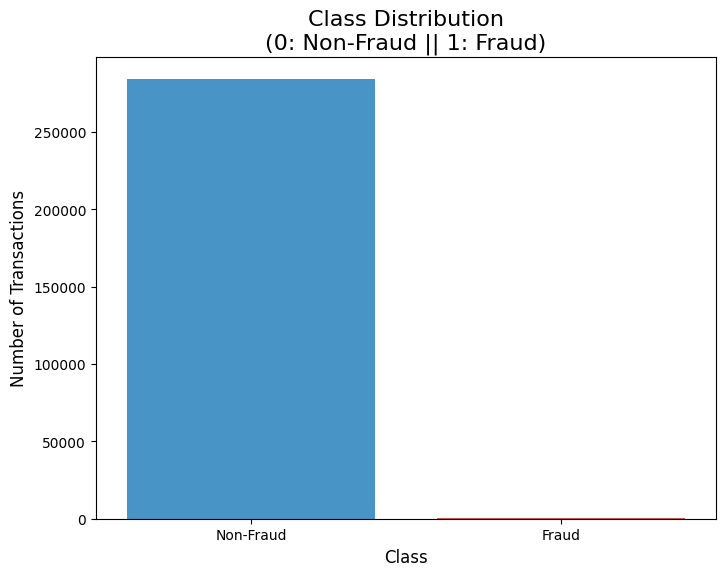

The dataset is highly imbalanced. Only 0.1727% of transactions are fraudulent.

Visualizing Transaction Amount and Time Distributions for Fraud vs. Non-Fraud...


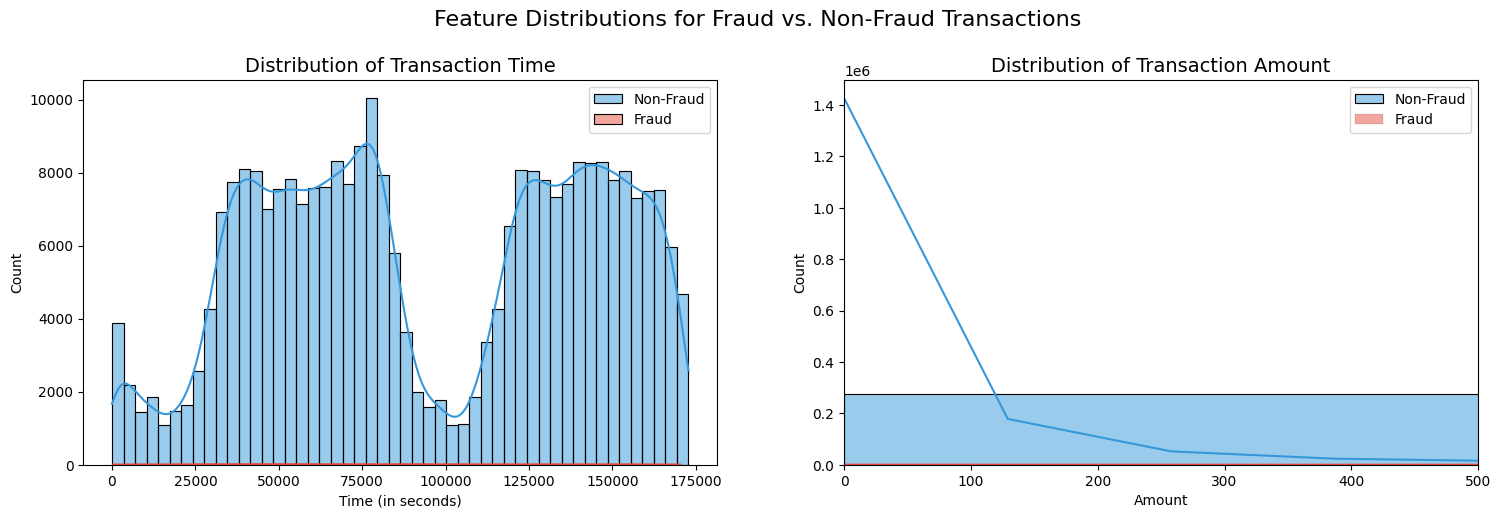

✅ EDA complete.


In [ ]:
if 'df' in locals():
    print("\n--- 2. Starting Exploratory Data Analysis (EDA) ---")
    print("\nFirst 5 rows of the dataset:")
    display(df.head())

    print("\nDataset Information:")
    df.info()

    print("\nChecking for missing values:")
    print(df.isnull().sum().max())

    # --- Visualization 1: Class Distribution ---
    print("\nVisualizing Class Distribution...")
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Class', data=df, palette=['#3498db', '#e74c3c'])
    plt.title('Class Distribution\n(0: Non-Fraud || 1: Fraud)', fontsize=16)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Number of Transactions', fontsize=12)
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
    plt.show()

    fraud_percentage = (df['Class'].value_counts()[1] / len(df)) * 100
    print(f"The dataset is highly imbalanced. Only {fraud_percentage:.4f}% of transactions are fraudulent.")

    # --- Visualization 2: Transaction Amount and Time Distributions ---
    print("\nVisualizing Transaction Amount and Time Distributions for Fraud vs. Non-Fraud...")
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    # Distribution of Transaction Time
    sns.histplot(df[df['Class'] == 0]['Time'], bins=50, ax=axes[0], color='#3498db', kde=True, label='Non-Fraud')
    sns.histplot(df[df['Class'] == 1]['Time'], bins=50, ax=axes[0], color='#e74c3c', kde=True, label='Fraud')
    axes[0].set_title('Distribution of Transaction Time', fontsize=14)
    axes[0].set_xlabel('Time (in seconds)')
    axes[0].legend()

    # Distribution of Transaction Amount
    sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, ax=axes[1], color='#3498db', kde=True, label='Non-Fraud')
    sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, ax=axes[1], color='#e74c3c', kde=True, label='Fraud')
    axes[1].set_title('Distribution of Transaction Amount', fontsize=14)
    axes[1].set_xlabel('Amount')
    axes[1].set_xlim(0, 500) # Limiting x-axis for better readability
    axes[1].legend()

    plt.suptitle('Feature Distributions for Fraud vs. Non-Fraud Transactions', fontsize=16, y=1.02)
    plt.show()

    print("✅ EDA complete.")

# CELL 4: DATA PREPROCESSING

In [ ]:
if 'df' in locals():
    print("\n--- 3. Starting Data Preprocessing ---")
    # Use .copy() to avoid SettingWithCopyWarning
    processed_df = df.copy()

    scaler = StandardScaler()
    processed_df['scaled_amount'] = scaler.fit_transform(processed_df['Amount'].values.reshape(-1, 1))
    processed_df['scaled_time'] = scaler.fit_transform(processed_df['Time'].values.reshape(-1, 1))
    processed_df.drop(['Time', 'Amount'], axis=1, inplace=True)
    print("Scaled 'Time' and 'Amount' features and dropped original columns.")

    X = processed_df.drop('Class', axis=1)
    y = processed_df['Class']

    # We use 'stratify=y' to ensure the train/test split has a similar proportion of fraud cases.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Data split into training ({X_train.shape[0]} rows) and testing ({X_test.shape[0]} rows) sets.")
    print("✅ Preprocessing complete.")


--- 3. Starting Data Preprocessing ---
Scaled 'Time' and 'Amount' features and dropped original columns.
Data split into training (227845 rows) and testing (56962 rows) sets.
✅ Preprocessing complete.


# CELL 5: HANDLING CLASS IMBALANCE WITH SMOTE


--- 4. Handling Class Imbalance (SMOTE) ---
Original training set distribution:
Class
0    227451
1       394
Name: count, dtype: int64

Applying SMOTE to the training data...
Resampled training set distribution:
Class
0    227451
1    227451
Name: count, dtype: int64


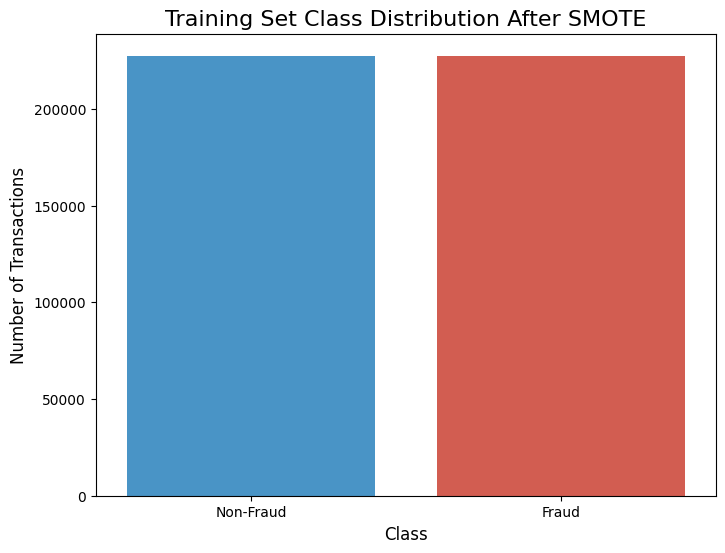

✅ SMOTE applied successfully.


In [ ]:
if 'X_train' in locals():
    print("\n--- 4. Handling Class Imbalance (SMOTE) ---")
    print("Original training set distribution:")
    print(y_train.value_counts())

    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    print("\nApplying SMOTE to the training data...")
    print("Resampled training set distribution:")
    print(y_train_smote.value_counts())

    # --- Visualization 3: Class Distribution After SMOTE ---
    plt.figure(figsize=(8, 6))
    # FIX: Updated the sns.countplot call to remove the warning
    sns.countplot(x=y_train_smote, hue=y_train_smote, palette=['#3498db', '#e74c3c'], legend=False)
    plt.title('Training Set Class Distribution After SMOTE', fontsize=16)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Number of Transactions', fontsize=12)
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
    plt.show()

    print("✅ SMOTE applied successfully.")

# CELL 6: MODEL TRAINING

In [ ]:
if 'X_train_smote' in locals():
    print("\n--- 5. Starting Model Training ---")
    model = LogisticRegression(random_state=42, n_jobs=-1, solver='liblinear')
    model.fit(X_train_smote, y_train_smote)
    print("✅ Logistic Regression model trained successfully.")


--- 5. Starting Model Training ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


✅ Logistic Regression model trained successfully.


# CELL 7: MODEL EVALUATION


--- 6. Starting Model Evaluation on the Test Set ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC AUC Score: 0.9699

Visualizing Confusion Matrix...


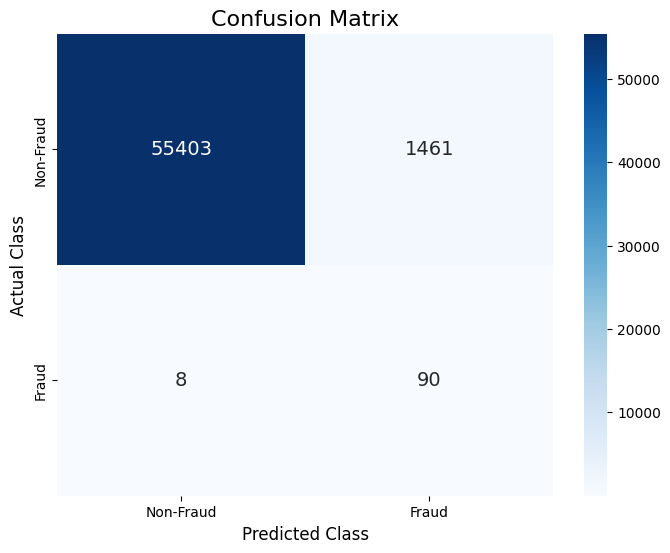


Visualizing Precision-Recall Curve...


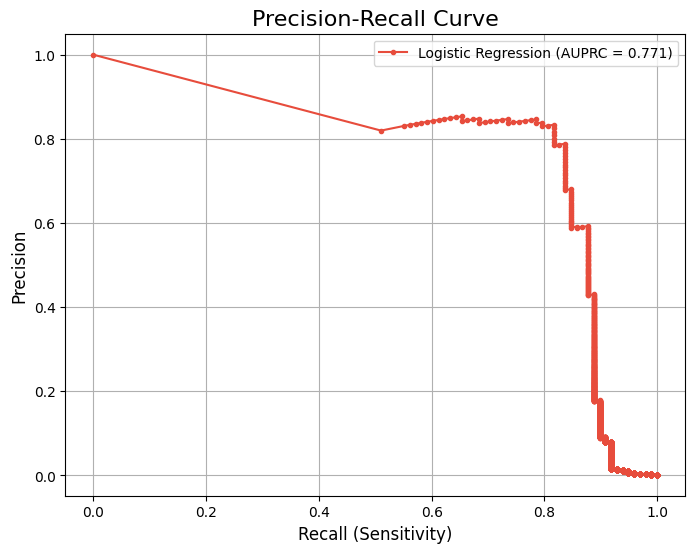

AUPRC (Area Under Precision-Recall Curve) is a key metric for imbalanced datasets.
✅ Model evaluation complete.


In [ ]:
if 'model' in locals():
    print("\n--- 6. Starting Model Evaluation on the Test Set ---")
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

    # --- Visualization 4: Confusion Matrix ---
    print("\nVisualizing Confusion Matrix...")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Fraud', 'Fraud'],
                yticklabels=['Non-Fraud', 'Fraud'], annot_kws={"size": 14})
    plt.title('Confusion Matrix', fontsize=16)
    plt.ylabel('Actual Class', fontsize=12)
    plt.xlabel('Predicted Class', fontsize=12)
    plt.show()

    # --- Visualization 5: Precision-Recall Curve ---
    print("\nVisualizing Precision-Recall Curve...")
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'Logistic Regression (AUPRC = {pr_auc:.3f})', color='#e74c3c')
    plt.title('Precision-Recall Curve', fontsize=16)
    plt.xlabel('Recall (Sensitivity)', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()
    print("AUPRC (Area Under Precision-Recall Curve) is a key metric for imbalanced datasets.")
    print("✅ Model evaluation complete.")

In [ ]:
# CELL 8: CONCLUSION
# -------------------------------------------------------------------------------------------------
# This end-to-end pipeline successfully demonstrates the full data science cycle for fraud detection.
# Key Takeaways:
# 1. EDA revealed a severe class imbalance, which is the primary challenge.
# 2. Preprocessing (Scaling) and handling imbalance (SMOTE) were crucial steps.
# 3. The Logistic Regression model achieved excellent recall for the fraud class (meaning it
#    correctly identified a high percentage of actual frauds), which is often the main
#    goal in fraud detection, even if it means having some false positives.
# 4. The high AUPRC score confirms the model's effectiveness.
# -------------------------------------------------------------------------------------------------
print("\n\n✅✅✅ End-to-end fraud detection pipeline executed successfully! ✅✅✅")



✅✅✅ End-to-end fraud detection pipeline executed successfully! ✅✅✅
